## **Experiment - 2.1 and 2.2**
**Student Name - Yuvpartap Singh Klair**    
**Student UID - 20BCS6448**    
**Class and Group - PHAIML-2A**   
**Date of Performance - 23/03/2022**

In [1]:
'''
MNIST data set - Inbuilt data set that consists of 70,000 small images of digits handwritten by high school students and employees of the US
* Images are well labeled with respective digit they represent
* It is like a hello world for ML. When a new algo is designed it is was tested on mnist dataset
* Each image consists of 2828 pixels and each feature represent one pixel intensity from 0 to 255.
* If the intensity is zero then pixel is white, if 255 then it is black
'''
#Using Scikit learn

!pip install scikit-learn --upgrade --quiet

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml # already available dataset in sklearn will be fetched using this

In [3]:
mnist = fetch_openml('mnist_784') #This works fine but can give error at later stages
mnist = fetch_openml('mnist_784', version =1, as_frame = False) # a better version  
# if the as_frame parameter is true then the X nd y variables will be presented in a pandas dataframe. if false then data will be presented in an array
mnist.keys() #variables in the dataset

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [5]:
x, y = mnist['data'], mnist['target'] # x is array of input images and y is array of output/target 


In [6]:
x


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
#to show the graphs in the code output
%matplotlib inline 

In [11]:
import matplotlib
import matplotlib.pyplot as plt


In [12]:
some_digit = x[36000] #selected one image at position 36001 from 70k images
some_digit_image = some_digit.reshape(28,28) #it stores the data in 1D form thats why reshape it into 2d form

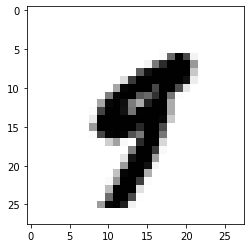

In [13]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
# imshow is used to show the image 
# cmap is the colour map used to decide the colours of the image. Examples: matplotlib.cm.viridis
# Returned Colormaps or the cm are copies, so that their modification does not change the global definition of the colormap i.e. in the original dataset.
# interpolation = 'none' works well when a big image is scaled down, while interpolation = 'nearest' works well when a small image is scaled up.


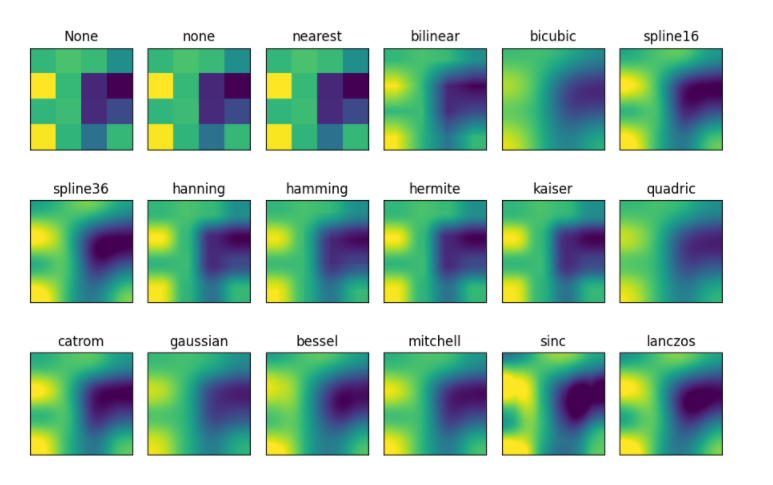

In [14]:
'''
Step-1 divide dataset into train and test samples-

 60000 in training set and 10000 in testing set
'''
x_train,x_test = x[:60000], x[60000:] 

In [15]:
y_train, y_test = y[:60000],y[60000:]

In [16]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [17]:
y_test.shape

(10000,)

In [18]:
x_test.shape

(10000, 784)

In [28]:
import numpy as np
shuffle_index = np.random.permutation(60000) #Shuffles the index of dataset
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

In [29]:
y_train_9 = (y_train==9)
y_test_9 = (y_test ==9)


In [30]:
y_train_9

array([False, False, False, ..., False,  True, False])

In [31]:
y_test_9

array([False, False, False, ..., False, False, False])

In [32]:
y_train = y_train.astype(np.int8) # Converting the datatype from object to int
y_test = y_test.astype(np.int8)

In [33]:
y_train

array([6, 4, 2, ..., 2, 9, 0], dtype=int8)

In [36]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(tol=0.1) #tolerence = 0.1 

In [37]:
reg.fit(x_train, y_train)
example = reg.predict([some_digit])
print(example)

[4]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(reg, x_train, y_train, cv = 3 , scoring = 'accuracy' )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [40]:
a.mean()

0.9165333333333333